In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ESN_results.csv')
df

,run,train_time,rmse,nrmse,r,skill
0,potential,6.0,5.2,0.04,0.91,0.78
1,x_conductivity,NaN,NaN,NaN,NaN,NaN
2,y_conductivity,NaN,NaN,NaN,NaN,NaN
3,current,8.0,0.1,0.02,0.77,0.00


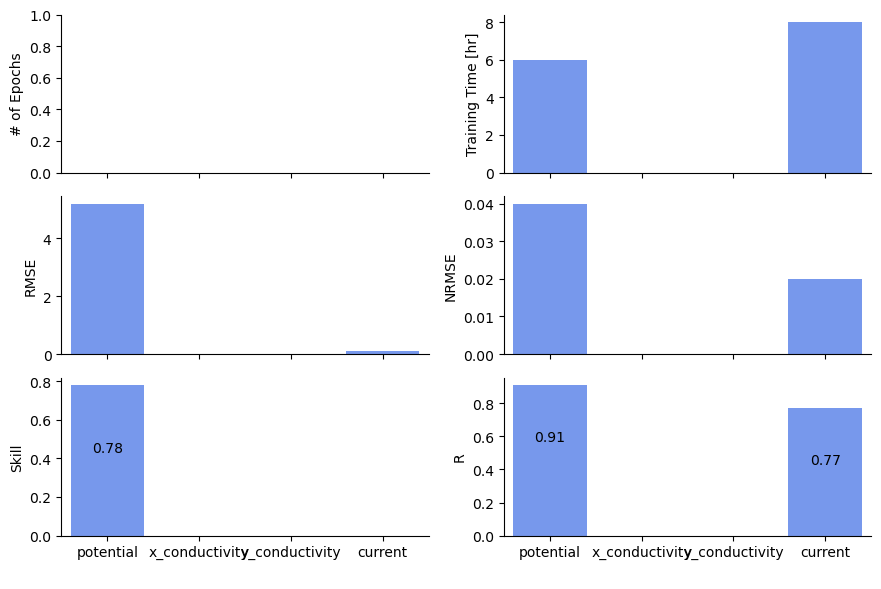

In [7]:
#plotting the results
#sns.set(style="whitegrid")
figs, axs = plt.subplots(3, 2, figsize=(9, 6), sharex=True)
#flatten the axs
axs = axs.flatten()

color = '#648FFF'
#sns.barplot(x='run', y='epochs', data=df, ax=axs[0], color=color)
sns.barplot(x='run', y='train_time', data=df, ax=axs[1], color=color)
sns.barplot(x='run', y='rmse', data=df, ax=axs[2], color=color)
sns.barplot(x='run', y='nrmse', data=df, ax=axs[3], color=color)
sns.barplot(x='run', y='skill', data=df, ax=axs[4], color=color)
sns.barplot(x='run', y='r', data=df, ax=axs[5], color=color)

#set the labels
axs[0].set_ylabel('# of Epochs')
axs[1].set_ylabel('Training Time [hr]')
axs[2].set_ylabel('RMSE')
axs[3].set_ylabel('NRMSE')
axs[4].set_ylabel('Skill')
axs[5].set_ylabel('R')

# Overlaying values onto bars in axs[5]
for p in axs[4].patches:
    axs[4].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()-0.4), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for p in axs[5].patches:
    axs[5].annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()-0.4), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

#remove top and right spines
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#print mu 
mu = r'$\mathrm{\mu}$'
#axs[4].set_xticklabels(['Potential\n[kV]', 'Conductivity\n(x) [S/m]', 'Conductivity\n(y) [S/m]', f'Current \n[{mu}A]'])
axs[4].set_xlabel(' ')
axs[5].set_xlabel(' ')

plt.tight_layout()
plt.savefig('ESN_results_global.png', dpi=500)